In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys

import numpy as np
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat)
from skimage.morphology import binary_dilation

import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
# from skimage.morphology import disk 

# import pandas as pd
# # from scipy.stats import *
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit

In [20]:
burger_image = imread("https://lh4.googleusercontent.com/O4xOxs7rftenKIzA9C5Ujarfrtn-z26IPrOZn9yLSMOfNBISUk4G8ESmUGqqIf3MNLLlQQgVWPHcHRKN4hJdKRTvQ_Hj3eQz5py1dE-r3eukcU8sAIHAPC6M4n-9SAct=w626")

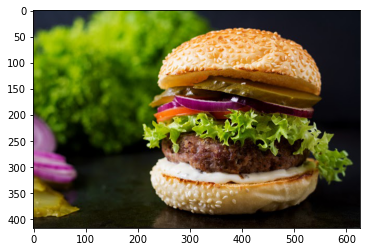

In [9]:
plt.imshow(burger_image)
plt.show()

In [25]:
dimensions = burger_image.shape
dimensions

(417, 626, 3)

In [26]:
dimensions[0] * dimensions[1] * dimensions[2]

783126

# Question 3

In [28]:
red = burger_image[:, :,0]
green = burger_image[:, :,1]
blue = burger_image[:, :,2]

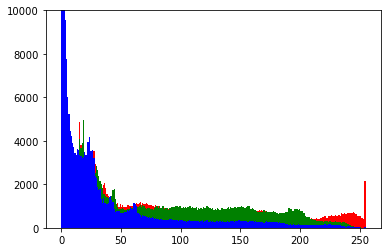

In [31]:
plt.hist(red.ravel(), bins = 256 , color = "red")
plt.hist(green.ravel(), bins = 256 , color = "green")
plt.hist(blue.ravel(), bins = 256 , color = "blue")
plt.ylim(0, 10000)
plt.show()

In [38]:
print(f"red: {red.ravel().mean():.3f}")
print(f"green: {green.ravel().mean():.3f}")
print(f"blue: {blue.ravel().mean():.3f}")

red: 90.039
green: 84.060
blue: 37.237


# Question 4

In [39]:
blue

array([[52, 52, 54, ..., 23, 21, 21],
       [52, 52, 54, ..., 24, 21, 21],
       [52, 52, 54, ..., 24, 21, 21],
       ...,
       [18, 23, 27, ...,  6,  4,  4],
       [ 9, 14, 20, ..., 13,  9,  9],
       [15, 18, 16, ..., 23, 24, 24]], dtype=uint8)

In [47]:
thresh = threshold_otsu(blue)
binary = blue > thresh
thresh

82

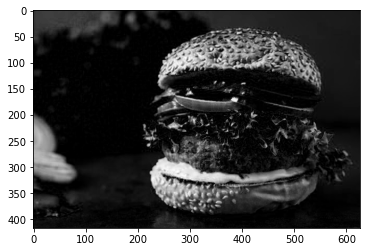

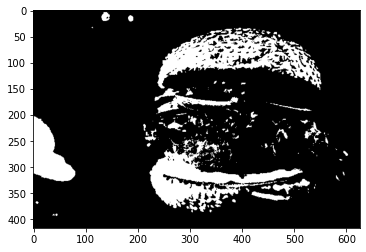

In [49]:
plt.imshow(blue, cmap='gray')
plt.show()
plt.imshow(binary, cmap='gray')
plt.show()

In [52]:
binary.shape

(417, 626)

In [56]:
# print(f"White pixels in blue channel: {np.sum(binary)}")

In [67]:
footprint = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]])
eroded = erosion(binary, footprint)

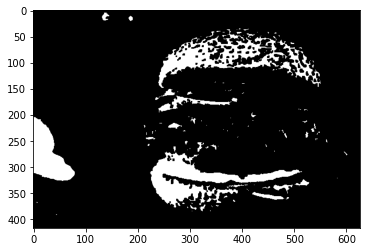

In [68]:
plt.imshow(eroded, cmap='gray')

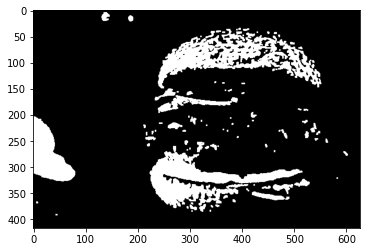

In [74]:
dilated = binary_dilation(eroded, selem =footprint)
plt.imshow(dilated, cmap='gray')

In [77]:
# print(f"White pixels in blue channel: {np.sum(eroded)}")
print(f"White pixels in blue channel: {np.sum(dilated)}")

White pixels in blue channel: 36838


# Pride and Prejudice, Part 1

In [81]:
path = r"text_data.txt"
text = ""
with open(path, "r", encoding="utf-8") as f:
    text= f.read()
print(len(text))

775716


In [95]:
# text

In [94]:
text_lower = text.lower()
text_lower

'\ufeffthe project gutenberg ebook of pride and prejudice, by jane austen\n\nthis ebook is for the use of anyone anywhere in the united states and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. you may copy it, give it away or re-use it under the terms\nof the project gutenberg license included with this ebook or online at\nwww.gutenberg.org. if you are not located in the united states, you\nwill have to check the laws of the country where you are located before\nusing this ebook.\n\ntitle: pride and prejudice\n\nauthor: jane austen\n\nrelease date: june, 1998 [ebook #1342]\n[most recently updated: february 10, 2021]\n\nlanguage: english\n\ncharacter set encoding: utf-8\n\nproduced by: anonymous volunteers and david widger\n\n*** start of the project gutenberg ebook pride and prejudice ***\n\nthere is an illustrated edition of this title which may viewed at ebook\n[# 42671 ]\n\ncover\n\n\n\n\n      pride and prejudice\n\n      by jane austen\n\n 

In [96]:
word_counter = Counter(re.split("\W+", text_lower))
# word_counter.most_common(20)
word_counter["pride"]

52

In [97]:
word_counter["prejudice"]

10

# Protagonist

In [103]:
nltk.download("stopwords")
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a1048794\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
text_no_stop_w = [w for w in text_lower.split() if w not in stop]
text_no_stop_w

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'pride',
 'prejudice,',
 'jane',
 'austen',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'states',
 'parts',
 'world',
 'cost',
 'almost',
 'restrictions',
 'whatsoever.',
 'may',
 'copy',
 'it,',
 'give',
 'away',
 're-use',
 'terms',
 'project',
 'gutenberg',
 'license',
 'included',
 'ebook',
 'online',
 'www.gutenberg.org.',
 'located',
 'united',
 'states,',
 'check',
 'laws',
 'country',
 'located',
 'using',
 'ebook.',
 'title:',
 'pride',
 'prejudice',
 'author:',
 'jane',
 'austen',
 'release',
 'date:',
 'june,',
 '1998',
 '[ebook',
 '#1342]',
 '[most',
 'recently',
 'updated:',
 'february',
 '10,',
 '2021]',
 'language:',
 'english',
 'character',
 'set',
 'encoding:',
 'utf-8',
 'produced',
 'by:',
 'anonymous',
 'volunteers',
 'david',
 'widger',
 '***',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'pride',
 'prejudice',
 '***',
 'illustrated',
 'edition',
 'title',
 'may',
 'viewed',
 'ebook',
 '[#',
 '42671',


In [109]:
word_counter_no_stop_w = Counter(text_no_stop_w)
word_counter_no_stop_w.most_common(20)

[('mr.', 766),
 ('could', 504),
 ('would', 458),
 ('elizabeth', 398),
 ('said', 343),
 ('mrs.', 338),
 ('must', 308),
 ('“i', 294),
 ('much', 292),
 ('miss', 272),
 ('one', 239),
 ('darcy', 215),
 ('never', 212),
 ('though', 209),
 ('soon', 200),
 ('every', 197),
 ('might', 195),
 ('may', 193),
 ('know', 191),
 ('think', 191)]

 the name of the protagonist Elizabeth